# Retrain word2vec using financial docs

Serialize Data into json files

In [1]:
import xlrd
import json
output = {}
excelSheet = xlrd.open_workbook('data_2.xlsx')
sheet1 = excelSheet.sheet_by_name('SA2000_with_return (1)')
for i in range(1, sheet1.nrows):
    trimmedData = {}
    trimmedData['stockID'] = sheet1.row(i)[0].value
    trimmedData['article'] = sheet1.row(i)[4].value
    output[i] = trimmedData
serializedOutput = json.dumps(output)
with open('./financialArticle.json', 'w') as outputFile:
    outputFile.write(serializedOutput)
outputFile.close()

Load back the financial data from json

In [2]:
with open('./financialArticle.json', 'r') as inputFile:
    financialData = json.load(inputFile)
inputFile.close()

Load the SQUAD data from json

In [3]:
with open('./train-v2.0.json', 'r') as inputFile:
    SQUADData = json.load(inputFile)
inputFile.close()

Retrain the word2vec model for future use

In [19]:
from nltk.tokenize import TreebankWordTokenizer
sentences = []
for index in financialData:
    try:
        tokenizedSentence = TreebankWordTokenizer().tokenize(financialData[index]['article'])
        sentences.append(tokenizedSentence)
    except:
        pass

In [29]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

'# fit a 2d PCA model to the vectors\nX = model_1[model_1.wv.vocab]\npca = PCA(n_components=2)\nresult = pca.fit_transform(X)\n# create a scatter plot of the projection\npyplot.scatter(result[:, 0], result[:, 1])\nwords = list(model_1.wv.vocab)\nfor i, word in enumerate(words):\n    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))\npyplot.show()'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


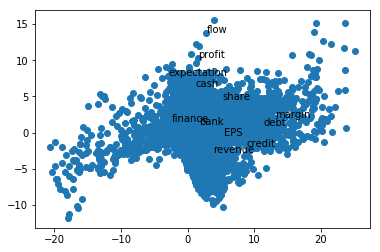

In [50]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
testVectors = ['finance', 'margin', 'revenue', 'profit', 'expectation', 'EPS', 'share', 'bank', 'credit', 'cash', 'flow', 'debt']
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(testVectors):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [62]:
model_1.wv.most_similar(positive = ['2.81'], topn = 5)

[('2.76', 0.9060478210449219),
 ('2.79', 0.9053827524185181),
 ('3.08', 0.8998939990997314),
 ('2.47', 0.8992294073104858),
 ('3.16', 0.8988616466522217)]

In [61]:
#2.8 is a price per share number: $2.8 per share
print('Is this a number related to share?', model_1.wv.similarity('2.81', 'share'))
print('Is this a number related to margin?', model_1.wv.similarity('2.81', 'margin'))
print('Is this a number related to money?', model_1.wv.similarity('2.81', '$'))
print('Is this a number related to percentage?', model_1.wv.similarity('2.81', 'percent'))
print('Is this a number related to profit?', model_1.wv.similarity('2.81', 'profit'))
print('Is this a number related to expectation?', model_1.wv.similarity('2.81', 'expectation'))

Is this a number related to share? 0.3109450561866467
Is this a number related to margin? 0.0795788219934574
Is this a number related to money? 0.5209500981824865
Is this a number related to percentage? 0.16398881978107024
Is this a number related to profit? 0.12132966456895183
Is this a number related to expectation? 0.08026975489507149


In [63]:
#2.76 is a price per share number: $2.8 per share
print('Is this a number related to share?', model_1.wv.similarity('2.76', 'share'))
print('Is this a number related to margin?', model_1.wv.similarity('2.76', 'margin'))
print('Is this a number related to money?', model_1.wv.similarity('2.76', '$'))
print('Is this a number related to percentage?', model_1.wv.similarity('2.76', 'percent'))
print('Is this a number related to profit?', model_1.wv.similarity('2.76', 'profit'))
print('Is this a number related to expectation?', model_1.wv.similarity('2.76', 'expectation'))

Is this a number related to share? 0.31162596796905273
Is this a number related to margin? 0.0552354234111144
Is this a number related to money? 0.5279378366169629
Is this a number related to percentage? 0.17225395236075594
Is this a number related to profit? 0.13530233083109938
Is this a number related to expectation? 0.0578863041705581


In [65]:
financialData['1']['article']

"Altria?s EPS rose again by close to 10%, year on year.          How did low gasoline prices impact the company's sales in recent quarters?          Looking forward will low gasoline prices still have a positive impact on Altria?s sales?          The recent earnings report of Altria (NYSE:MO) showed another strong quarter with a gain of 3.2% in revenue, year over year, and a diluted earnings per share of $0.78 -- it was higher by two cents than the consensus market estimate. The company acknowledged in the past that higher revenue was due, in part, to low gasoline prices, which may have contributed to higher household spending on other consumer goods including cigarettes. But has low gasoline prices actually boosted the company's volume sold in the previous quarters? If so, will it still have a positive impact on its shipments? The company's rise in revenue in recent quarters was due to both rising prices and higher volume of cigarettes sold. The chart below shows the year on year perc

In [67]:
#3.2 is a number of gain percentage
print('Is this a number related to share?', model_1.wv.similarity('3.2', 'share'))
print('Is this a number related to margin?', model_1.wv.similarity('3.2', 'margin'))
print('Is this a number related to money?', model_1.wv.similarity('3.2', '$'))
print('Is this a number related to percentage?', model_1.wv.similarity('3.2', 'percent'))
print('Is this a number related to profit?', model_1.wv.similarity('3.2', 'profit'))
print('Is this a number related to revenue?', model_1.wv.similarity('3.2', 'revenue'))

Is this a number related to share? 0.2156921837805344
Is this a number related to margin? 0.19560952155786035
Is this a number related to money? 0.3755048865821232
Is this a number related to percentage? 0.23972346191391414
Is this a number related to profit? 0.2512006527141525
Is this a number related to expectation? 0.36492143665877225
